In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/Users/palhares/opt/anaconda3/envs/msc/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# MNISTI IMAGE --> Tensors

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [7]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image, label = train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

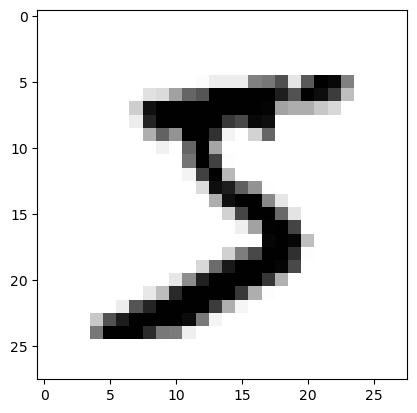

In [15]:
plt.imshow(image.reshape((28, 28)), cmap='gist_yarg') #viridis

In [16]:
torch.manual_seed(101)

# 0 images, 1 images, ...
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [17]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # Formatting

In [18]:
# First batch
for images, labels in train_loader:
    # 60,000 / 100    60 times
    break

In [19]:
images

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [20]:
images.shape

torch.Size([100, 1, 28, 28])

In [21]:
labels.shape

torch.Size([100])

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


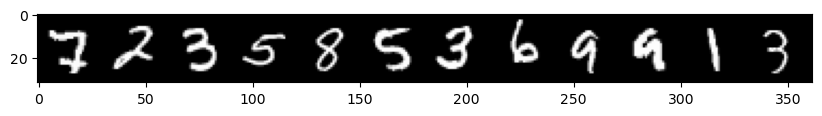

In [22]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10, 4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [23]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120, 84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1) # Multi Class Classification

In [24]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# ANN ---> CNN
for param in model.parameters():
   print(param.numel())

94080
120
10080
84
840
10


In [26]:
# 105,214 total parameters

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
images.shape # -----> [100, 784]

torch.Size([100, 1, 28, 28])

In [29]:
images.view(100, -1).shape

torch.Size([100, 784])

In [30]:
import time
start_time = time.time()

# Training
epochs = 10

# Trackers
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1

        y_pred = model(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1] #print(y_pred.data)
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} - Batch {b} - Loss {loss.item()} - Accuracy: {acc}')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500, -1))

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted==y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print(f'Duration: {total_time/60} mins')

Epoch 0 - Batch 200 - Loss 0.2356237918138504 - Accuracy: 83.245
Epoch 0 - Batch 400 - Loss 0.35330715775489807 - Accuracy: 87.5325
Epoch 0 - Batch 600 - Loss 0.13765770196914673 - Accuracy: 89.58166666666666
Epoch 1 - Batch 200 - Loss 0.24509961903095245 - Accuracy: 94.88
Epoch 1 - Batch 400 - Loss 0.1400277465581894 - Accuracy: 95.1075
Epoch 1 - Batch 600 - Loss 0.07300641387701035 - Accuracy: 95.38333333333334
Epoch 2 - Batch 200 - Loss 0.09081434458494186 - Accuracy: 96.57
Epoch 2 - Batch 400 - Loss 0.06027328595519066 - Accuracy: 96.685
Epoch 2 - Batch 600 - Loss 0.06637213379144669 - Accuracy: 96.74333333333334
Epoch 3 - Batch 200 - Loss 0.109520822763443 - Accuracy: 97.655
Epoch 3 - Batch 400 - Loss 0.05006568133831024 - Accuracy: 97.4875
Epoch 3 - Batch 600 - Loss 0.03207705542445183 - Accuracy: 97.52333333333333
Epoch 4 - Batch 200 - Loss 0.11824934929609299 - Accuracy: 98.14
Epoch 4 - Batch 400 - Loss 0.043929316103458405 - Accuracy: 98.0225
Epoch 4 - Batch 600 - Loss 0.05379

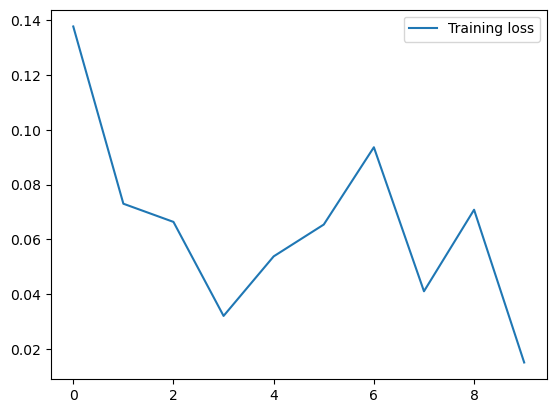

In [31]:
plt.plot(train_losses, label='Training loss')
plt.legend()

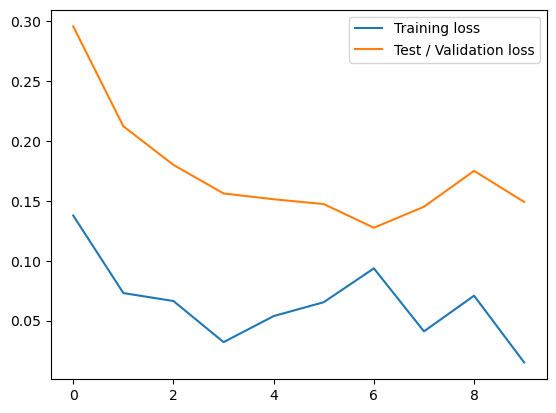

In [32]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test / Validation loss')
plt.legend()

In [35]:
train_acc = [t/600 for t in train_correct]

In [36]:
train_acc

[89.58166666666666,
 95.38333333333334,
 96.74333333333334,
 97.52333333333333,
 98.01166666666667,
 98.405,
 98.68833333333333,
 98.88166666666666,
 99.125,
 99.26333333333334]

In [37]:
test_acc = [t/100 for t in test_correct]

In [38]:
test_acc

[tensor(94.3700),
 tensor(95.7900),
 tensor(96.9300),
 tensor(97.1500),
 tensor(97.4300),
 tensor(97.5700),
 tensor(97.8100),
 tensor(97.6500),
 tensor(97.6700),
 tensor(97.8100)]

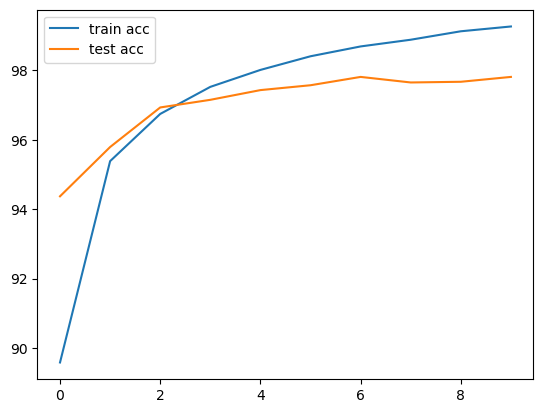

In [40]:
plt.plot(train_acc, label='train acc')
plt.plot(test_acc, label='test acc')
plt.legend()

In [41]:
# New unseen data

test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [42]:
with torch.no_grad():
    correct = 0

    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted==y_test).sum()

In [45]:
100 * correct.item()/len(test_data)

97.81

In [46]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    4,    0,    2,    2,    5,    2,    4,    2],
       [   0, 1127,    3,    0,    0,    0,    3,    7,    0,    3],
       [   1,    3, 1004,    3,    0,    0,    1,    9,    3,    0],
       [   3,    1,    5,  984,    0,    9,    1,    1,    3,    2],
       [   0,    0,    2,    0,  965,    3,    2,    3,    3,   10],
       [   0,    0,    0,    9,    0,  861,    2,    0,    3,    3],
       [   1,    1,    2,    0,    5,    3,  943,    0,    1,    0],
       [   1,    0,    3,    6,    0,    2,    0,  988,    3,    0],
       [   2,    3,    9,    3,    0,   10,    1,    3,  951,    3],
       [   0,    0,    0,    5,   10,    2,    0,   15,    3,  986]])